## Loading libraries

In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

### Applying K means (unsupervised ML ) to some basic data to explain the concept

#### Code along 

kudos to geeks for geeks tutorial from AlindGupta - the ironhack materials are a little heavy going so we are reusing this resource to run through a visual explanation of what KNN/Kmeans is about, together in class 


In [4]:
# import additional libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [5]:
# create data array
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)


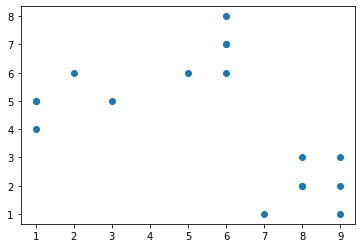

In [6]:
# visualise the data 
plt.scatter(x1,x2)
plt.show()


### Explanation 

visualising the data tells us that 3 clusters looks right but visualising alone is not the full story 

- distortion = the avg of the squared distances from the cluster centres of the respective cluster
- inertia = sum of squared distance of samples to their closest cluster centre

In [7]:
# build the cluster model , calculate distortion and inertia 
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10) #k between 1 and 9
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [8]:
# tabulate results - distortion

for key, val in mapping1.items():
    print(f'{key}:{val}')

1:3.4577032384495707
2:1.7687413573405673
3:0.8819889697423957
4:0.7587138847606585
5:0.6872918402957646
6:0.6006691410317333
7:0.5293957542883456
8:0.4442520441076937
9:0.35294117647058826


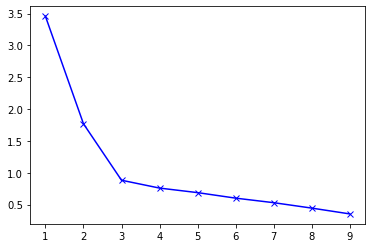

In [9]:
# visualise results - distortion
plt.plot(K, distortions, 'bx-')

# elbow method - tells us what is the right K to use

In [10]:
# tabulate results -  inertia
for key, val in mapping2.items():
    print(f'{key}:{val}')


1:217.64705882352948
2:68.42857142857142
3:16.228571428571428
4:12.695238095238095
5:9.6
6:7.333333333333334
7:6.25
8:4.166666666666667
9:3.0


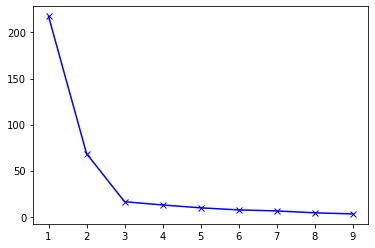

In [11]:
# visualise results - inertia

plt.plot(K, inertias, 'bx-')

### What have you learnt about the application of K-means to cluster data ? 

Your notes here : 

-
-
- 

K-means is an unsupervised learning algorithm for clustering problems, whereas KNN is a supervised learning algorithm for classification and regression problems 

Although both involve similar statistical techniques, you can use KNN to predict by learning from past data, to classify similar data points based on shared characteristics


## Loading data

In [12]:
#sticking with the healthcare for all dataset 
data = pd.read_csv('lesson_4.05_data.csv') # this file is in files_for_lesson_and_activities folder
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,T,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,S,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,R,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,R,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,S,2,F,6.864865


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88393 entries, 0 to 88392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HV1             88393 non-null  int64  
 1   IC1             88393 non-null  int64  
 2   IC5             88393 non-null  int64  
 3   CARDPROM        88393 non-null  int64  
 4   NUMPRM12        88393 non-null  int64  
 5   NGIFTALL        88393 non-null  int64  
 6   TIMELAG         88393 non-null  float64
 7   year            88393 non-null  float64
 8   GENDER          88393 non-null  object 
 9   HOMEOWNR        88393 non-null  object 
 10  DOMAIN_letters  88393 non-null  object 
 11  RFA_frequency   88393 non-null  int64  
 12  RFA_monetary    88393 non-null  object 
 13  AVGGIFT         88393 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 9.4+ MB


## Splitting the dataset between the categorical and numerical columns

In [14]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)


print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT
0,479,307,12883,27,14,31,4.000000,37.000000,4,7.741935
1,5468,1088,36175,12,13,3,18.000000,52.000000,2,15.666667
2,497,251,11576,26,14,27,12.000000,37.570799,4,7.481481
3,1000,386,15130,27,14,16,9.000000,28.000000,4,6.812500
4,576,240,9836,43,25,37,14.000000,20.000000,2,6.864865
...,...,...,...,...,...,...,...,...,...,...
88388,733,285,11390,23,12,24,3.000000,48.000000,4,3.375000
88389,988,433,18807,6,12,1,8.117886,37.570799,1,25.000000
88390,1679,806,26538,4,8,1,8.117886,50.000000,1,20.000000
88391,376,263,12178,14,17,7,3.000000,38.000000,3,8.285714


Dataframe of categorical columns: 



,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
0,F,other,T,E
1,M,H,S,G
2,M,U,R,E
3,F,U,R,E
4,F,H,S,F
...,...,...,...,...
88388,F,H,S,D
88389,M,other,C,G
88390,M,H,C,F
88391,M,other,C,E


In [16]:
#Lets apply scaling to the numerical columns except the final column
#which will be our y variable, average gift
# moving the mean to do a normal distribution

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

Getting a dataframe with the result from the standard scaler which is a numpy array.

As the numpy arrays doesn't have column names, we pick up the column names from the numerical (original) dataframe.

In [17]:
pdscaled_numericals= pd.DataFrame(scaled_numericals,columns=numericals.columns.tolist()[:-1])

In [18]:
pdscaled_numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
0,-0.615805,-0.197546,-0.327329,1.015038,0.287697,2.563947,-0.522139,-4.223845e-02,1.980286
1,4.724826,4.624687,2.413425,-0.736841,0.057410,-0.762852,1.253030,1.067743e+00,0.102470
2,-0.596536,-0.543314,-0.481123,0.898246,0.287697,2.088690,0.492244,-1.674335e-11,1.980286
3,-0.058084,0.290234,-0.062926,1.015038,0.287697,0.781733,0.111850,-7.082272e-01,1.980286
4,-0.511968,-0.611233,-0.685867,2.883710,2.820857,3.276833,0.745839,-1.300217e+00,0.102470


## Dummifying categorical columns

In [19]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()

## Alternative way to do it with OHE: However, you will have to load the corresponding libraries of sklearn.
#encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
#encoded = encoder.transform(categoricals).toarray()

,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0


## Putting everything together

In [23]:
full = pd.concat([pdscaled_numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", full.shape)
print()
full

The dataset size is:  (88393, 20)



,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G,AVGGIFT
0,-0.615805,-0.197546,-0.327329,1.015038,0.287697,2.563947,-5.221388e-01,-4.223845e-02,0,0,0,1,0,0,1,0,1,0,0,7.741935
1,4.724826,4.624687,2.413425,-0.736841,0.057410,-0.762852,1.253030e+00,1.067743e+00,1,0,0,0,0,1,0,0,0,0,1,15.666667
2,-0.596536,-0.543314,-0.481123,0.898246,0.287697,2.088690,4.922435e-01,-1.674335e-11,1,0,1,0,1,0,0,0,1,0,0,7.481481
3,-0.058084,0.290234,-0.062926,1.015038,0.287697,0.781733,1.118501e-01,-7.082272e-01,0,0,1,0,1,0,0,0,1,0,0,6.812500
4,-0.511968,-0.611233,-0.685867,2.883710,2.820857,3.276833,7.458391e-01,-1.300217e+00,0,0,0,0,0,1,0,0,0,1,0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88388,-0.343903,-0.333384,-0.503009,0.547870,-0.172878,1.732247,-6.489366e-01,7.717479e-01,0,0,0,0,0,1,0,0,0,0,0,3.375000
88389,-0.070930,0.580433,0.369744,-1.437593,-0.172878,-1.000480,-1.154796e-12,-1.674335e-11,1,0,0,1,0,0,0,0,0,0,1,25.000000
88390,0.668773,2.883497,1.279446,-1.671177,-1.094027,-1.000480,-1.154796e-12,9.197454e-01,1,0,0,0,0,0,0,0,0,1,0,20.000000
88391,-0.726064,-0.469221,-0.410286,-0.503257,0.978559,-0.287595,-6.489366e-01,3.176030e-02,1,0,0,1,0,0,0,0,1,0,0,8.285714


In [24]:
full.columns.tolist()

['HV1',
 'IC1',
 'IC5',
 'CARDPROM',
 'NUMPRM12',
 'NGIFTALL',
 'TIMELAG',
 'year',
 'GENDER_M',
 'GENDER_other',
 'HOMEOWNR_U',
 'HOMEOWNR_other',
 'DOMAIN_letters_R',
 'DOMAIN_letters_S',
 'DOMAIN_letters_T',
 'DOMAIN_letters_U',
 'RFA_monetary_E',
 'RFA_monetary_F',
 'RFA_monetary_G',
 'AVGGIFT']

In [25]:
full_x = pd.DataFrame(full,columns=full.columns.tolist()[:-1])
full_x.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,-0.615805,-0.197546,-0.327329,1.015038,0.287697,2.563947,-0.522139,-4.223845e-02,0,0,0,1,0,0,1,0,1,0,0
1,4.724826,4.624687,2.413425,-0.736841,0.057410,-0.762852,1.253030,1.067743e+00,1,0,0,0,0,1,0,0,0,0,1
2,-0.596536,-0.543314,-0.481123,0.898246,0.287697,2.088690,0.492244,-1.674335e-11,1,0,1,0,1,0,0,0,1,0,0
3,-0.058084,0.290234,-0.062926,1.015038,0.287697,0.781733,0.111850,-7.082272e-01,0,0,1,0,1,0,0,0,1,0,0
4,-0.511968,-0.611233,-0.685867,2.883710,2.820857,3.276833,0.745839,-1.300217e+00,0,0,0,0,0,1,0,0,0,1,0


In [27]:
#define X and y. 
#X is all the features, scaled numericals and encoded categoricals which are our independent variables
#y is the variable we seek to predict 

X = full_x
y = full['AVGGIFT']

## Splitting data intro train and test sets.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Training the K-NN model

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [31]:
knn_predictions = knn_model.predict(X_test)
# to get some predictions for y we use the X_test set. 
# we will later compare the predictions from X_test to real y_test 

## Getting the error metrics of our K-NN model

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   3.51
The mean squared error of the model in the test set is:  50.07
The root mean squared error of the model in the test set is:   7.08
The R2 of the model in the test set is: 0.27


# Activity

Train a linear model and compare the performance of both models in the test set.


In [34]:
#HINT : from sklearn import linear_model

#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
#HINT : lm_predictions = lm_model.predict(X_test)
lm = linear_model.LinearRegression()
#next, is the simple bit - all we do is fit the model to our data 
lm_model = lm.fit(X_train,y_train)

In [43]:
lm_predictions  = lm_model.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   3.33
The mean squared error of the model in the test set is:  37.24
The root mean squared error of the model in the test set is:   6.10
The R2 of the model in the test set is: 0.46


# Activity

If you think a little bit about it, the number of neighbors might be very important for our results, but will it be the only parameter that matters? Go to the documentation and check the parameters and the values they can take, pick the one you think is more relevant and change its value in the model. 

Hint: If K (number of neighbors) is the most important one, maybe we could measure the way these K instances affect our prediction

In [ ]:
uniform_model = KNeighborsRegressor(n_neighbors=9)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

In [ ]:
# example using parameter distance 
distance_model = KNeighborsRegressor(n_neighbors=9, weights = "distance")
distance_model.fit(X_train, y_train)
distance_model.score(X_test, y_test)

# visualise KNN

Let's visualize how KNN actually works. First of all install the mlxtend library and create a dataframe containing the two most relevant numerical variables and the target, in that order. Once you have done it sample it with n = 100, introduce that sample into this function with an arbitrary k:

In [ ]:
#to do this aou will need to close and halt your notebook & install mlxtend library

#I had to first install pip (conda install pip) 
# then run pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [ ]:
new = pd.concat([X,y],axis=1)
new = new[['HV1','IC1','AVGGIFT']].sample(n=100,random_state=100)
new.head()

In [ ]:
# run the plot - be prepared this will look like crazy modern art
knn_comparison(new,1)

### Activity - take time to look at the chart and reflect on the data
What can you see in the plot? Try re running the cell to plot the data with a higher or lower k (1,2,4,9,15,30)



#### explanation 
The lower the number of k the more over-fitted it will be. We can see that with k = 1, the boundaries are very clear and as we increase k the plots start turning very messy until the last two plots, where it is oversimplified.

# Metrics Review (Linear Regression):

From all the regression metrics we have seen, which one(s) do you think you will use in most cases?


We have seen R2, MSE, RMSE and MAE. Of course, there is not a magic solution for which you should always use it, but there are some details worth knowing:

*  R2 is scaled, which means that it is independent of the data. This one would be the one to go with if we don't know a lot about the data and general information about our model. However, it can be misleading, as it is supposed to be between 0 and 1 but sometimes it is not (you can read about it here. In fact, R2 is a biased estimator (more information here.

*  MAE would be the median of the regression metrics as what it measures is the sum of distances between predicted and real values (errors), and that won't give a special treat to really bad predictions, so if that's what we want this metric should do great.

*  MSE - It is the mean of the squared distance of the errors, which will weight the bad predictions.

*  RMSE - Root MSE, essentially it is the same but it is easier to understand within the data context

### Activity 

Focusing on either the linear or knn model it can be useful to calculate the R2 adjusted- read through the guide below and run the last cell to calculate the metric. Hint: you will need to refer to r2, so first you should set the parameter (hard code it) from one of the earlier model summary cells 

- r_squared = 


#### R2 and R2-adjusted 
R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2.

--------

#### The adjusted R-squared is calculated as:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

--------

Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. However, there is one main difference between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

NOTE : You only need R2 when working with samples. In other words, R2 isn’t necessary when you have data from an entire population.

In [ ]:
#R2adj can be computed with python as:
    
score_adj = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)